# Introduction to A/B Testing
A/B testing is an experimental approach in data science where two versions of a variable (A and B) are compared. The goal is to identify which version performs better in terms of a predefined metric.

## Why A/B Testing?
- Measure the impact of changes on key business metrics.
- Make data-driven decisions to improve customer experience.
- Widely used in web design, marketing, and product development.

## Basic Terminology
- **Control Group**: Receives the original version (A).
- **Treatment Group**: Receives the modified version (B).
- **Metric**: The measurable outcome (e.g., click-through rate, conversion rate) to assess success.

# Limitations of A/B Testing
- **Not Suitable for Small Audiences**: A/B tests require sufficient data for reliable results.
- **Short-Term vs Long-Term Effects**: Results may vary over time.
- **One Change at a Time**: Testing multiple changes can be complex (consider Multivariate Testing if needed).

# How A/B Testing Works
The process involves:
1. **Define Objective**: Set a clear hypothesis.
2. **Create Variants**: Design the control and treatment versions.
3. **Split the Audience**: Randomly assign users to either group.
4. **Measure & Compare**: Analyze the results to check if the difference is statistically significant.

---
# Case Study: Airbnb's A/B Testing on Listings
Airbnb conducted an A/B test to improve their listing page design. They wanted to determine if changing the layout would improve user engagement and booking rates.

## Background
- **Control**: Existing listing design.
- **Treatment**: New design with enhanced photos and layout.

## Key Metrics
- **Primary**: Booking rate
- **Secondary**: Time spent on listing, click-through rate on photos

---

# Simple Example: Testing Conversion Rates with Python
Suppose we want to test whether a new call-to-action button color increases conversions.

## Hypothesis
- H0: The new button color has no effect on conversions.
- H1: The new button color increases conversions.


In [7]:
# Simulating Data for A/B Test
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Simulate conversion rates (control: 10%, treatment: 12%)
control_data = np.random.binomial(1, 0.10, 1000)
treatment_data = np.random.binomial(1, 0.12, 1000)

# Create a DataFrame
data = pd.DataFrame({
    "Group": ["Control"] * 1000 + ["Treatment"] * 1000,
    "Conversion": np.concatenate([control_data, treatment_data])
})

# Display the first few rows
data.head()

,Group,Conversion
0,Control,0
1,Control,1
2,Control,0
3,Control,0
4,Control,0


# Analyzing Results with a Chi-Square Test
To determine if there's a significant difference in conversion rates, we'll use a Chi-Square test.

In [8]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Group'], data['Conversion'])
print("Contingency Table:\n", contingency_table)

# Run the Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: Significant difference in conversions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversions.")


Contingency Table:
 Conversion    0    1
Group               
Control     900  100
Treatment   888  112
Chi-Square Test Statistic: 0.6384280950571948
P-Value: 0.4242805805131731
Fail to reject the null hypothesis: No significant difference in conversions.



# Visualizing A/B Test Results
Visualizing helps in understanding the conversion difference between the groups.

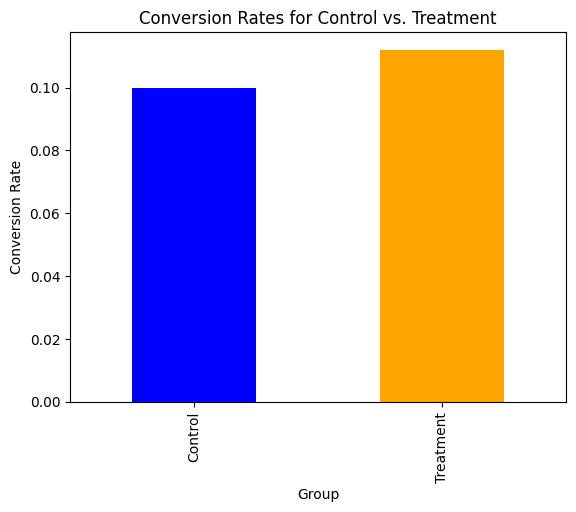

In [9]:
import matplotlib.pyplot as plt

# Calculate conversion rates for each group
conversion_rates = data.groupby("Group")["Conversion"].mean()

# Plot the results
conversion_rates.plot(kind="bar", color=["blue", "orange"])
plt.title("Conversion Rates for Control vs. Treatment")
plt.xlabel("Group")
plt.ylabel("Conversion Rate")
plt.show()

# Interpreting Results
In the Airbnb test:
- **Hypothesis Test**: Showed a statistically significant increase in bookings for the new design.
- **Business Decision**: The team rolled out the new design, leading to a 5% increase in bookings.

In our simulated example:
- Based on the Chi-Square test, we determine if there’s a significant difference between the control and treatment groups.

# Best Practices for A/B Testing
- **Clearly Define Objectives**: Ensure the metric aligns with business goals.
- **Ensure Sufficient Sample Size**: Small samples may lead to inconclusive results.
- **Monitor for Bias**: Randomly assign users and ensure no interference.
- **Consider External Factors**: Avoid running tests during unusual times/events.